<a href="https://colab.research.google.com/github/psam96/state_map/blob/main/visited_states_us.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Creates state map of US.
Colors the visited states in different years.
"""

In [1]:
# Install the required packages
!pip install geopandas
!pip install geodatasets

In [2]:
# Import required packages
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import geopandas
import os

os.environ["SHAPE_RESTORE_SHX"] = "YES"

In [3]:
# Load the shape file
states = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/data/shape_files/States_shapefile.shp")

# Remove Alaska and Hawai from the map
states_small = states[(states.State_Name != "ALASKA") & (states.State_Name != "HAWAII")]


# View the edited map
# Confirm the name of headers and if the states have been removed
states_small


,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
5,6,ECOMAP,CO,COLORADO,F,924,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."
6,7,SIMS,CT,CONNECTICUT,F,925,"POLYGON ((-73.53039 41.52275, -73.51715 41.665..."
7,8,None,DE,DELAWARE,P,926,"POLYGON ((-75.70707 38.55759, -75.71071 38.649..."
8,9,None,DC,DISTRICT OF COLUMBIA,P,927,"POLYGON ((-77.00793 38.96667, -76.91090 38.890..."
9,10,None,FL,FLORIDA,P,928,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."
10,11,None,GA,GEORGIA,N,929,"MULTIPOLYGON (((-85.13016 31.77885, -85.13156 ..."


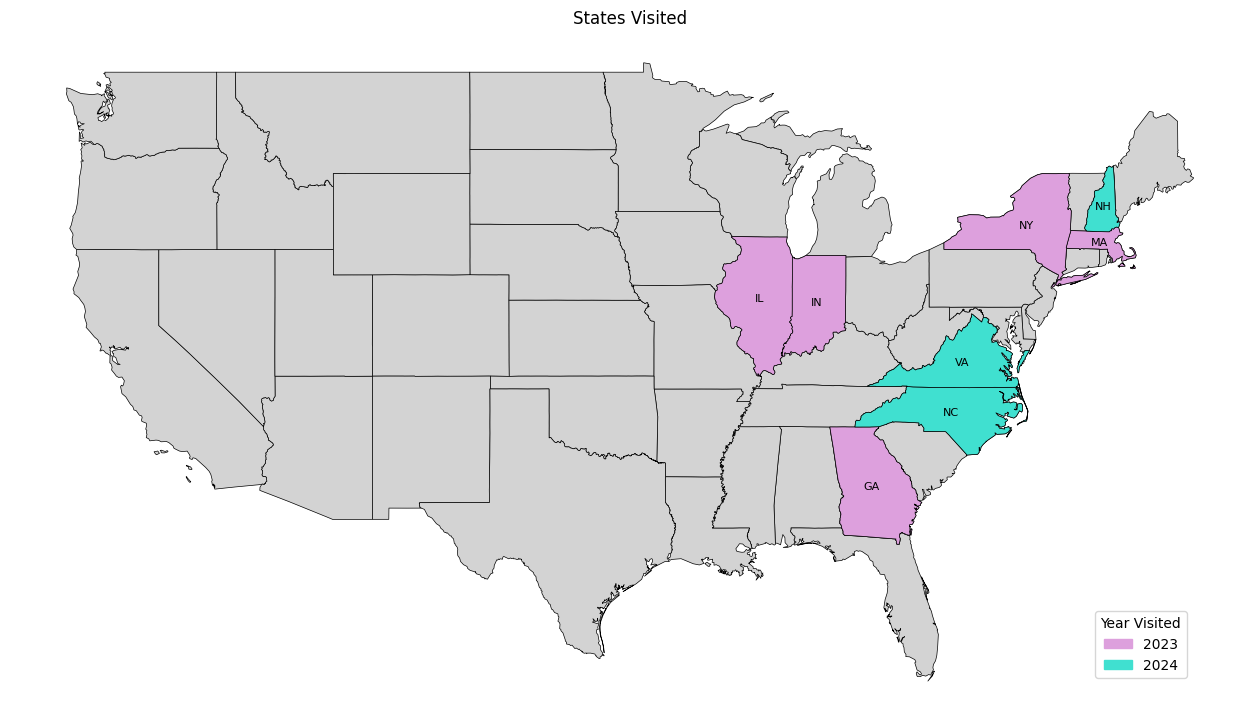

In [4]:
# Dictionary of visited states
visited_states_2023 = ["INDIANA", "GEORGIA", "MASSACHUSETTS", "ILLINOIS", "NEW YORK"]
visited_states_2024 = ["NEW HAMPSHIRE", "NORTH CAROLINA", "VIRGINIA"]

# Plot the entire map
fig, ax = plt.subplots(1,1, figsize = (16,9))
states_small.plot(ax = ax, edgecolor = "Black", linewidth = 0.5, facecolor = "lightgray")


# Plot visited states in 2023 over the entire map
visited_2023 = states[states.State_Name.isin(visited_states_2023)]
visited_2023.plot(ax = ax, edgecolor = "Black", linewidth = 0.5, facecolor = "plum", label = "Year 2023")

# Plot visited states in 2024 over the entire map
visited_2024 = states[states.State_Name.isin(visited_states_2024)]
visited_2024.plot(ax = ax, edgecolor = "Black", linewidth = 0.5, facecolor = "turquoise", label = "Year 2024")

# Making a single list for visited states
visited_list = [visited_2023, visited_2024]

# Show state names for visited states
for visited_year in visited_list:
    for idx, row in visited_year.iterrows():
        centroid = row.geometry.centroid
        ax.text(centroid.x, centroid.y, row["State_Code"], fontsize=8, ha='center', va='center')

# Create cutom legend using Patch
handles = [Patch(color = "plum"), Patch(color = "turquoise")]
labels = ["2023", "2024"]

# Show the custom legend
ax.legend(handles, labels, title = "Year Visited", loc = [0.875, 0.05])

# Give title
ax.set_title("States Visited")
ax.set_axis_off()

# Save the map
plt.savefig("map_us.png", dpi = 300, bbox_inches = None)

# Show the map
plt.show()